# Data Analysis:

## Load & Read the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
usa_country_wise = pd.read_csv("../DATA/usa_county_wise.csv", sep=',')
usa_country_wise.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",1/22/20,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",1/22/20,0,0
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",1/22/20,0,0
3,63072001,PR,PRI,630,72001.0,Adjuntas,Puerto Rico,US,18.180117,-66.754367,"Adjuntas, Puerto Rico, US",1/22/20,0,0
4,63072003,PR,PRI,630,72003.0,Aguada,Puerto Rico,US,18.360255,-67.175131,"Aguada, Puerto Rico, US",1/22/20,0,0


In [3]:
usa_country_wise.shape

(627920, 14)

In [4]:
usa_country_wise.dtypes

UID                 int64
iso2               object
iso3               object
code3               int64
FIPS              float64
Admin2             object
Province_State     object
Country_Region     object
Lat               float64
Long_             float64
Combined_Key       object
Date               object
Confirmed           int64
Deaths              int64
dtype: object

### check is there any null values are present and Handle the null values:

In [5]:
usa_country_wise.isnull().sum()

UID                  0
iso2                 0
iso3                 0
code3                0
FIPS              1880
Admin2            1128
Province_State       0
Country_Region       0
Lat                  0
Long_                0
Combined_Key         0
Date                 0
Confirmed            0
Deaths               0
dtype: int64

In [6]:
usa_country_wise = usa_country_wise.drop(columns=['FIPS', 'Admin2'], axis=1)
usa_country_wise.head()

,UID,iso2,iso3,code3,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
0,16,AS,ASM,16,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",1/22/20,0,0
1,316,GU,GUM,316,Guam,US,13.444300,144.793700,"Guam, US",1/22/20,0,0
2,580,MP,MNP,580,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",1/22/20,0,0
3,63072001,PR,PRI,630,Puerto Rico,US,18.180117,-66.754367,"Adjuntas, Puerto Rico, US",1/22/20,0,0
4,63072003,PR,PRI,630,Puerto Rico,US,18.360255,-67.175131,"Aguada, Puerto Rico, US",1/22/20,0,0


### convert the columns heading to lower case.

In [7]:
usa_country_wise.columns = [col.strip().lower() for col in usa_country_wise.columns]
usa_country_wise.columns

Index(['uid', 'iso2', 'iso3', 'code3', 'province_state', 'country_region',
       'lat', 'long_', 'combined_key', 'date', 'confirmed', 'deaths'],
      dtype='object')

### convert the data to lower case.

In [8]:
obj = usa_country_wise.dtypes[usa_country_wise.dtypes == 'object'].index
usa_country_wise[obj] = usa_country_wise[obj].apply(lambda x:x.astype(str).str.lower())
usa_country_wise.head()

,uid,iso2,iso3,code3,province_state,country_region,lat,long_,combined_key,date,confirmed,deaths
0,16,as,asm,16,american samoa,us,-14.271000,-170.132000,"american samoa, us",1/22/20,0,0
1,316,gu,gum,316,guam,us,13.444300,144.793700,"guam, us",1/22/20,0,0
2,580,mp,mnp,580,northern mariana islands,us,15.097900,145.673900,"northern mariana islands, us",1/22/20,0,0
3,63072001,pr,pri,630,puerto rico,us,18.180117,-66.754367,"adjuntas, puerto rico, us",1/22/20,0,0
4,63072003,pr,pri,630,puerto rico,us,18.360255,-67.175131,"aguada, puerto rico, us",1/22/20,0,0


In [9]:
usa_country_wise.dtypes

uid                 int64
iso2               object
iso3               object
code3               int64
province_state     object
country_region     object
lat               float64
long_             float64
combined_key       object
date               object
confirmed           int64
deaths              int64
dtype: object

### get the unique values

In [10]:
for col in usa_country_wise.columns:
    print(f"{col} ---> {len(usa_country_wise[col].unique())}")

uid ---> 3340
iso2 ---> 6
iso3 ---> 6
code3 ---> 6
province_state ---> 58
country_region ---> 1
lat ---> 3226
long_ ---> 3226
combined_key ---> 3340
date ---> 188
confirmed ---> 11091
deaths ---> 2011


### handle the date column:

In [11]:
usa_country_wise['date'] = pd.to_datetime(usa_country_wise['date'])
usa_country_wise.head()

,uid,iso2,iso3,code3,province_state,country_region,lat,long_,combined_key,date,confirmed,deaths
0,16,as,asm,16,american samoa,us,-14.271000,-170.132000,"american samoa, us",2020-01-22,0,0
1,316,gu,gum,316,guam,us,13.444300,144.793700,"guam, us",2020-01-22,0,0
2,580,mp,mnp,580,northern mariana islands,us,15.097900,145.673900,"northern mariana islands, us",2020-01-22,0,0
3,63072001,pr,pri,630,puerto rico,us,18.180117,-66.754367,"adjuntas, puerto rico, us",2020-01-22,0,0
4,63072003,pr,pri,630,puerto rico,us,18.360255,-67.175131,"aguada, puerto rico, us",2020-01-22,0,0


In [12]:
usa_country_wise['month'] = [val.date().month for val in usa_country_wise['date']]

In [13]:
usa_country_wise['month'].unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [14]:
mnt = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul'}
usa_country_wise['month'] = usa_country_wise['month'].map(mnt)
usa_country_wise.head()

,uid,iso2,iso3,code3,province_state,country_region,lat,long_,combined_key,date,confirmed,deaths,month
0,16,as,asm,16,american samoa,us,-14.271000,-170.132000,"american samoa, us",2020-01-22,0,0,Jan
1,316,gu,gum,316,guam,us,13.444300,144.793700,"guam, us",2020-01-22,0,0,Jan
2,580,mp,mnp,580,northern mariana islands,us,15.097900,145.673900,"northern mariana islands, us",2020-01-22,0,0,Jan
3,63072001,pr,pri,630,puerto rico,us,18.180117,-66.754367,"adjuntas, puerto rico, us",2020-01-22,0,0,Jan
4,63072003,pr,pri,630,puerto rico,us,18.360255,-67.175131,"aguada, puerto rico, us",2020-01-22,0,0,Jan


In [15]:
usa_country_wise['month'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul'], dtype=object)

## Perform the Analysis based on province_state and months

In [16]:
usa_country_wise['province_state'].unique()

array(['american samoa', 'guam', 'northern mariana islands',
       'puerto rico', 'virgin islands', 'alabama', 'alaska', 'arizona',
       'arkansas', 'california', 'colorado', 'connecticut', 'delaware',
       'district of columbia', 'florida', 'georgia', 'hawaii', 'idaho',
       'illinois', 'indiana', 'iowa', 'kansas', 'kentucky', 'louisiana',
       'maine', 'maryland', 'massachusetts', 'michigan', 'minnesota',
       'mississippi', 'missouri', 'montana', 'nebraska', 'nevada',
       'new hampshire', 'new jersey', 'new mexico', 'new york',
       'north carolina', 'north dakota', 'ohio', 'oklahoma', 'oregon',
       'pennsylvania', 'rhode island', 'south carolina', 'south dakota',
       'tennessee', 'texas', 'utah', 'vermont', 'virginia', 'washington',
       'west virginia', 'wisconsin', 'wyoming', 'diamond princess',
       'grand princess'], dtype=object)

### Analysis based on some states of US

list = ['alaska', 'arizona', 'california', 'district of columbia', 'florida', 'georgia', 'new jersey', 'new mexico', 'new york',
'texas', 'washington']

In [17]:
usa_country_wise_ = usa_country_wise.loc[
    (usa_country_wise['province_state'] == 'alaska') |
    (usa_country_wise['province_state'] == 'arizona') |
    (usa_country_wise['province_state'] == 'california') |
    (usa_country_wise['province_state'] == 'district of columbia') |
    (usa_country_wise['province_state'] == 'florida') |
    (usa_country_wise['province_state'] == 'georgia') |
    (usa_country_wise['province_state'] == 'new jersey') |
    (usa_country_wise['province_state'] == 'new mexico') |
    (usa_country_wise['province_state'] == 'new york') |
    (usa_country_wise['province_state'] == 'texas') |
    (usa_country_wise['province_state'] == 'washington')
]
usa_country_wise_.head()

,uid,iso2,iso3,code3,province_state,country_region,lat,long_,combined_key,date,confirmed,deaths,month
149,84002013,us,usa,840,alaska,us,55.322224,-161.972202,"aleutians east, alaska, us",2020-01-22,0,0,Jan
150,84002016,us,usa,840,alaska,us,52.323300,-174.159600,"aleutians west, alaska, us",2020-01-22,0,0,Jan
151,84002020,us,usa,840,alaska,us,61.149982,-149.142699,"anchorage,alaska,us",2020-01-22,0,0,Jan
152,84002050,us,usa,840,alaska,us,60.909805,-159.856183,"bethel, alaska, us",2020-01-22,0,0,Jan
153,84002060,us,usa,840,alaska,us,58.745140,-156.701064,"bristol bay, alaska, us",2020-01-22,0,0,Jan


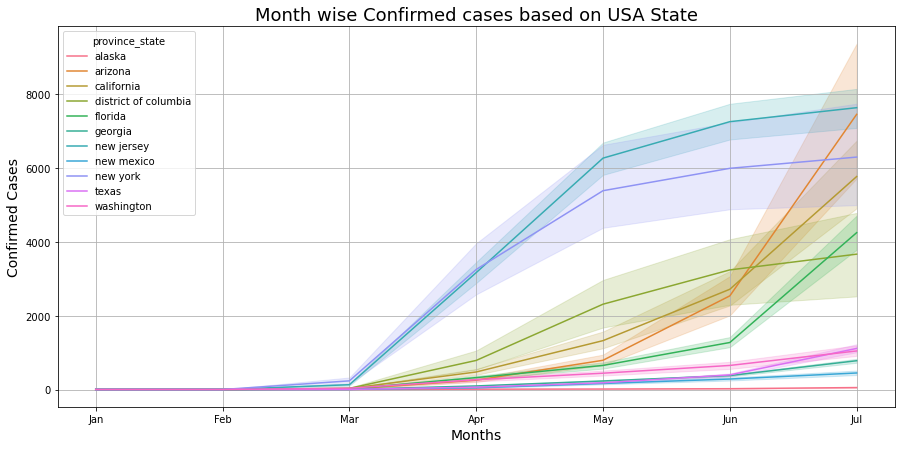

In [18]:
# plot the data: month wise confirmed cases

plt.figure(figsize=(15,7))
plt.grid()
line_plot = sns.lineplot(data=usa_country_wise_, x='month', y='confirmed', hue='province_state')
line_plot.set_title("Month wise Confirmed cases based on USA State", fontsize=18)
line_plot.set_xlabel('Months', fontsize=14)
line_plot.set_ylabel("Confirmed Cases", fontsize=14)
# plt.savefig("../Plots or Graphs Pictures/month_wise_confirmed_cases_based_on_usa_state_LineChart.png")
plt.show()

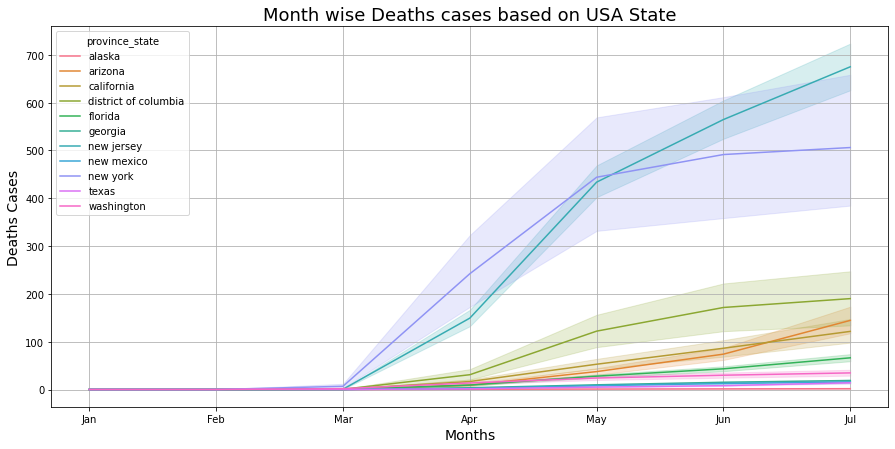

In [19]:
# plot the data: month wise Death cases

plt.figure(figsize=(15,7))
plt.grid()
line_plot = sns.lineplot(data=usa_country_wise_, x='month', y='deaths', hue='province_state')
line_plot.set_title("Month wise Deaths cases based on USA State", fontsize=18)
line_plot.set_xlabel('Months', fontsize=14)
line_plot.set_ylabel("Deaths Cases", fontsize=14)
# plt.savefig("../Plots or Graphs Pictures/month_wise_death_cases_based_on_usa_state_LineChart.png")
plt.show()

## get the highest confirmed & death cases month & province_state wise:

In [20]:
province_state_wise_data = usa_country_wise[['province_state','month','confirmed', 'deaths']].sort_values(
    by=['confirmed', 'deaths'], ascending=False).groupby(['province_state', 'month']).first()
province_state_wise_data

confirmed  deaths
province_state month                   
alabama        Apr         1058      55
               Feb            0       0
               Jan            0       0
               Jul        10420     203
               Jun         4210     140
...                         ...     ...
wyoming        Jan            0       0
               Jul          455       0
               Jun          356       0
               Mar           25       0
               May          278       0

[406 rows x 2 columns]

## get the highest confirmed & death casesprovince_state wise:

In [21]:
province_state_wise_data = usa_country_wise[['province_state','confirmed', 'deaths']].sort_values(
    by=['confirmed', 'deaths'], ascending=False).groupby(['province_state']).first()
province_state_wise_data

,confirmed,deaths
province_state,,
alabama,10420,203
alaska,1402,9
american samoa,0,0
arizona,109988,1807
arkansas,5729,40
california,176028,4375
colorado,9256,405
connecticut,17459,1402
delaware,6560,284


## get the highest confirmed & death cases month & some province_state wise:
province_state_list = ['alaska', 'arizona', 'california', 'district of columbia', 'florida', 'georgia', 'new jersey', 'new mexico', 'new york', 'texas', 'washington']

In [22]:
new_data = usa_country_wise_[['province_state','month','confirmed', 'deaths']].sort_values(
    by=['confirmed', 'deaths'], ascending=False).groupby(['province_state', 'month']).first()
new_data

confirmed  deaths
province_state month                   
alaska         Apr          179       4
               Feb            0       0
               Jan            0       0
               Jul         1402       9
               Jun          440       6
...                         ...     ...
washington     Jan            1       0
               Jul        14579     645
               Jun        10177     610
               Mar         2330     150
               May         8092     567

[77 rows x 2 columns]